In [1]:
import os
import glob
import matplotlib.pyplot as plt
from collections import Counter

In [4]:
def count_classes_in_labels(label_folder_path):
    """
    Counts the occurrences of each class in YOLO label files within a given folder.

    :param label_folder_path: Path to the folder containing label files.
    :return: A Counter object with class IDs as keys and their counts as values.
    """
    class_counts = Counter()

    # Iterate over all label files in the folder
    for label_file in glob.glob(os.path.join(label_folder_path, '*.txt')):
        with open(label_file, 'r') as file:
            for line in file:
                class_id = int(line.split()[0])  # Extract the class ID (first number on each line)
                class_counts[class_id] += 1

    return class_counts

In [5]:
def plot_class_distribution(class_counts, class_names):
    """
    Plots a bar chart of the class distribution.

    :param class_counts: A Counter object with class IDs as keys and their counts as values.
    :param class_names: A dictionary mapping class IDs to class names.
    """
    # Sorting the classes for better visualization
    classes = sorted(class_counts.keys())
    counts = [class_counts[class_id] for class_id in classes]
    labels = [class_names[class_id] for class_id in classes]

    plt.figure(figsize=(15, 8))
    plt.bar(labels, counts)
    plt.xlabel('Class Name')
    plt.ylabel('Count')
    plt.title('Class Distribution in YOLO Label Files')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

In [6]:
# Class names mapping
class_names = {
    0: "PET_WaterUnlabeled", 1: "PET_WaterLabeled", 2: "PET_Unlabeled", 3: "PET_Labeled", 4: "PET_Others",
    5: "PE_Makgeolli", 6: "PS_BananaMilk", 7: "PS_Bowl", 8: "PP_Squarebox", 9: "PS_WangRamen",
    10: "PS_Drink", 11: "PS_Viyott", 12: "PP_DeliveryLid", 13: "PP_DeliveryBowlBlack", 14: "PP_DeliveryBowlWhite",
    15: "Others_Hetbahn", 16: "CAN_Beverage", 17: "Glass_Bottle", 18: "Undefined_TakeoutCup",
    19: "Undefined_TakeoutCap", 20: "Undefined_TakeoutCapHot", 21: "Undefined_TakeoutCapHotBlack",
    22: "Undefined_Egg", 23: "Undefined_TransparentBowl", 24: "Undefined_Shampoo", 25: "Undefined_Yoplait",
    26: "Undefined_Sauce", 27: "Undefined_Sprayer", 28: "Undefined_Plate", 29: "Undefined_Undefined",
    30: "Paper", 31: "Medicine", 32: "Vinyl", 33: "Hand"
}

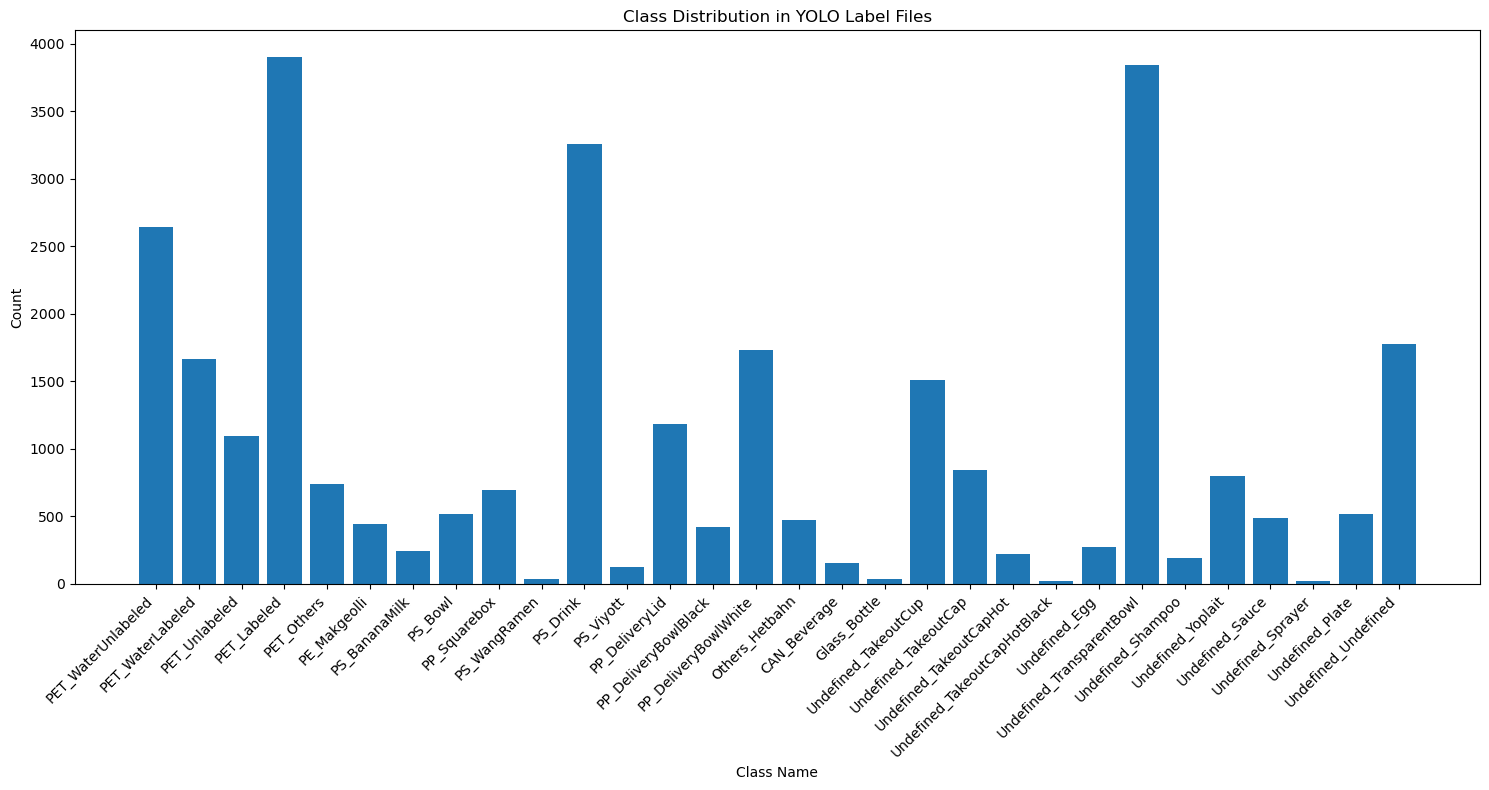

In [8]:
# Define the path to your label folder (modify this path according to your directory structure)
label_folder_path = '../wim_data/crop_paste/202312120217_10_3000/train/labels'
# Count the classes in the label files
class_counts = count_classes_in_labels(label_folder_path)

# Plot the class distribution
plot_class_distribution(class_counts, class_names)